<a href="https://colab.research.google.com/github/lidersamir/CUFICO_2019_2/blob/master/Seguimiento/Seguimiento2/N1041328785/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ejercicio.

escribir un integrador para una dimension  y 3 dimensiones, para verificar los resultados podemos usar algunas librerias como scipy.integrate.quad

para las siguientes funciones 

en una dimension:
$$x^{-3}$$
$$x^{-\frac{1}{2}}$$
con $x$ en $[1,10]$

en tres dimesiones:

$$ \frac{1}{x}+y+z^{2}$$

con $x,y,z$ en $[1,10]; [0,2]; [0,2]$ respectivamente.

usando $N = 100, 1000, 10000$

Nota: Para solucionar este problema debemos tener en cuenta que $E^{*} = (b-a)E$, la varianza para el metodo de montecarlo solo esta bien definido para funciones con cuadrado integrable.




In [0]:
import numpy as np
from random import random
from scipy import integrate
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [0]:
#definimos los limites 

a = 1 #limite inferior
b = 10 #limite superior

c = 0
d = 2 

N = 100000

#############funciones a integrar

##funciones unideimensionales
def F(x):
  return (x)**(-3)

def G(x):
  return (x)**-0.5

##fuciones tridimensionales
def H(x, y, z):
  return x**(-1) + y + z**2


#metodo de montecarlo

I1 = 0
I2 = 0
I3 = 0

S2_1=0
S2_2=0

for i in range(N):
  x = (b-a)*random() + a # genera un numero aleatorio den el intervalo [a,b]
  y = (d-c)*random()
  z = (d-c)*random()

  I1 = I1 + F(x)
  I2 = I2 + G(x)
  I3 = I3 + H(x, y, z)

for i in range(N):

  S2_1 = S2_1+(F(x)-I1*(b-a)/N)**2
  S2_2 = S2_1+(G(x)-I2*(b-a)/N)**2
print("estimado de la integral")
print (I1*(b-a)/N, S2_1/N)
print (integrate.quad(F, 1, 10))

print (I2*(b-a)/N, S2_2/N)
print (integrate.quad(G, 1, 10))

#print (integrate.quad(H, 1, 10))

0.4948522791386749 0.09083482036654009
(0.495, 3.33106475941296e-10)
4.322603082514332 0.09094770741090384
(4.32455532033676, 1.6881526376757614e-09)


## metodos para reducir $S^{2}$

### 1) muestreo estratificado
  se piensa que una integral puede ser calculada como la suma de
      otras dos integrales producto de la redeficion de los
      intervalos de integracion de la integral original.
      $$E = \sum_{j=1}^k \frac{ Vol(M_j)}{N_j} \sum_{m=1}^{N_j}f(x_{jm})$$ 

   

### 2) muestreo ponderado
este muestreo puede ser tomado como una generalizacion del caso anterior. 
$$ E = \frac{1}{N}\sum_{m=1}^{N}\frac{f(x_{m})}{p(x_{m})}$$

por tanto $$ S^{2} = \frac{1}{N}\sum_{m=1}^{N}(\frac{f(x_{m})}{p(x_{m})})^2 - E^2$$

In [159]:
#si tenemos un conjuno de N valores 
N=100000
#definimos k divisiones de N
k=10
N_k= int(N/k)
D_k=(b-a)/k

#Usamos el metodo de montecarlos en cada N_k

I1=0
a=1
b=10
I1_k = 0
#I2_k = 0
#I3_k = 0

for j in range(k):
  a = a + j*D_k
 
  for i in range(N_k):
    x = (D_k)*random() + a # genera un numero aleatorio den el intervalo [a,b]
    #y = (d-c)*random()
    #z = (d-c)*random()

    I1_k = I1_k + F(x)
    #I2_k = I2_k + G(x)
    #I3_k = I3_k + H(x, y, z)
  
  I1 = I1 + I1_k/N_k


print (I1)

1.0347207212923476e-55


## Algoritmo de metropolis :
### sistema descrito por  $P(x_1,...,x_n)$ con $x$ aletorio 

si tenemos un estado $\phi(x_1,...,x_n)$

usamos el siguiente algoritmo:

1)Generar aleatoriamente $\phi_0$

2)Generar aleatoriamente $\phi'$

3)Calcular $\Delta S = -\ln(\frac{P(\phi')}{P(\phi_0)})$

4)si $\Delta S < 0$, $\phi_1 = \phi$

5)si $\Delta S >0$, acepto $\phi$:
con una probabilidad  $\frac{P(\phi')}{P(\phi_1)}$, de lo contrario no acepto $\phi$

6)volver al paso 2

aclaracion del paso 5 $x < P$ entonces $\phi_1 = \phi$


aclaracion del paso 5 $x > P$ entonces $\phi_1 != \phi$
#### Ejemplo 
Implementar metrópolis $-\lambda$ y aplicar para el experimento de Rutherford $$P(\theta)=\frac{e^{\frac{-(\theta-\mu)^{2}}{2\sigma^{2}}}}{\sqrt{2\pi}\sigma}$$ con $\mu=0$ y $\sigma=0.1$: Generar 1000 eventos y graficar $\theta$.



In [0]:
#Funcion P(x)
#constantes de la funcion 
sigma = 0.1
mu = 0

#Funcion para el ejercicio de Rutherfor
def P(x):
  return np.e**(-((x-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


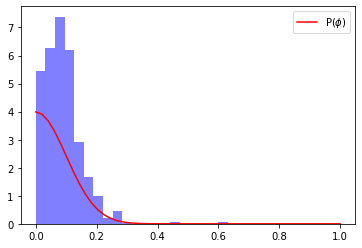

In [123]:

# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    
    Phi = np.zeros(steps)
    phi_0 = random()
    prob_0 =P(phi_0)
    
    for i in range(steps):
        phi = random()
        prob = P(phi)
        aceptacion = prob / prob_0
        if aceptacion > np.random.random():
            Phi[i] = phi
            phi_0 = phi
            prob_0 = prob
        else:
            Phi[i] = phi_0
    
    return Phi


X = metropolis(P, 1000)
x = np.linspace(0, 1)
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='blue', alpha=0.5)

plt.plot(x,P(x), "r", label= "P($\phi$)")
plt.legend(loc="best")
plt.show()
